## `Import libs`

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## `load Dataset`

In [3]:
df = pd.read_csv('diabetes.csv')

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## `Explore The Dataset`

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.duplicated().sum()

0

### so our data is very clean we will not make a preprocessing on it


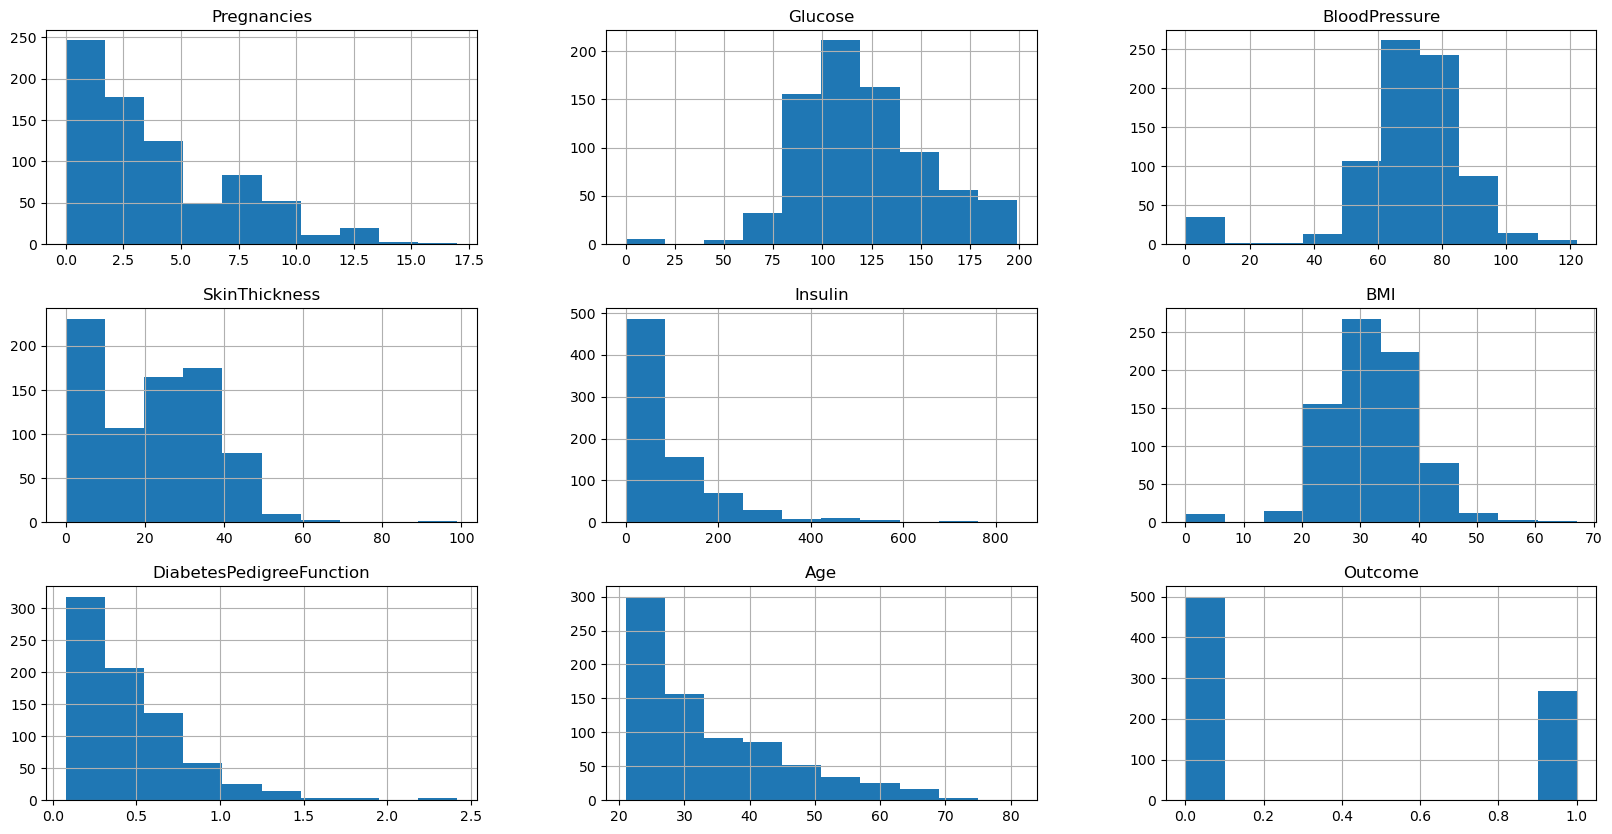

In [13]:
df.hist(bins = 10, figsize = (20, 10))
plt.show()

<AxesSubplot:>

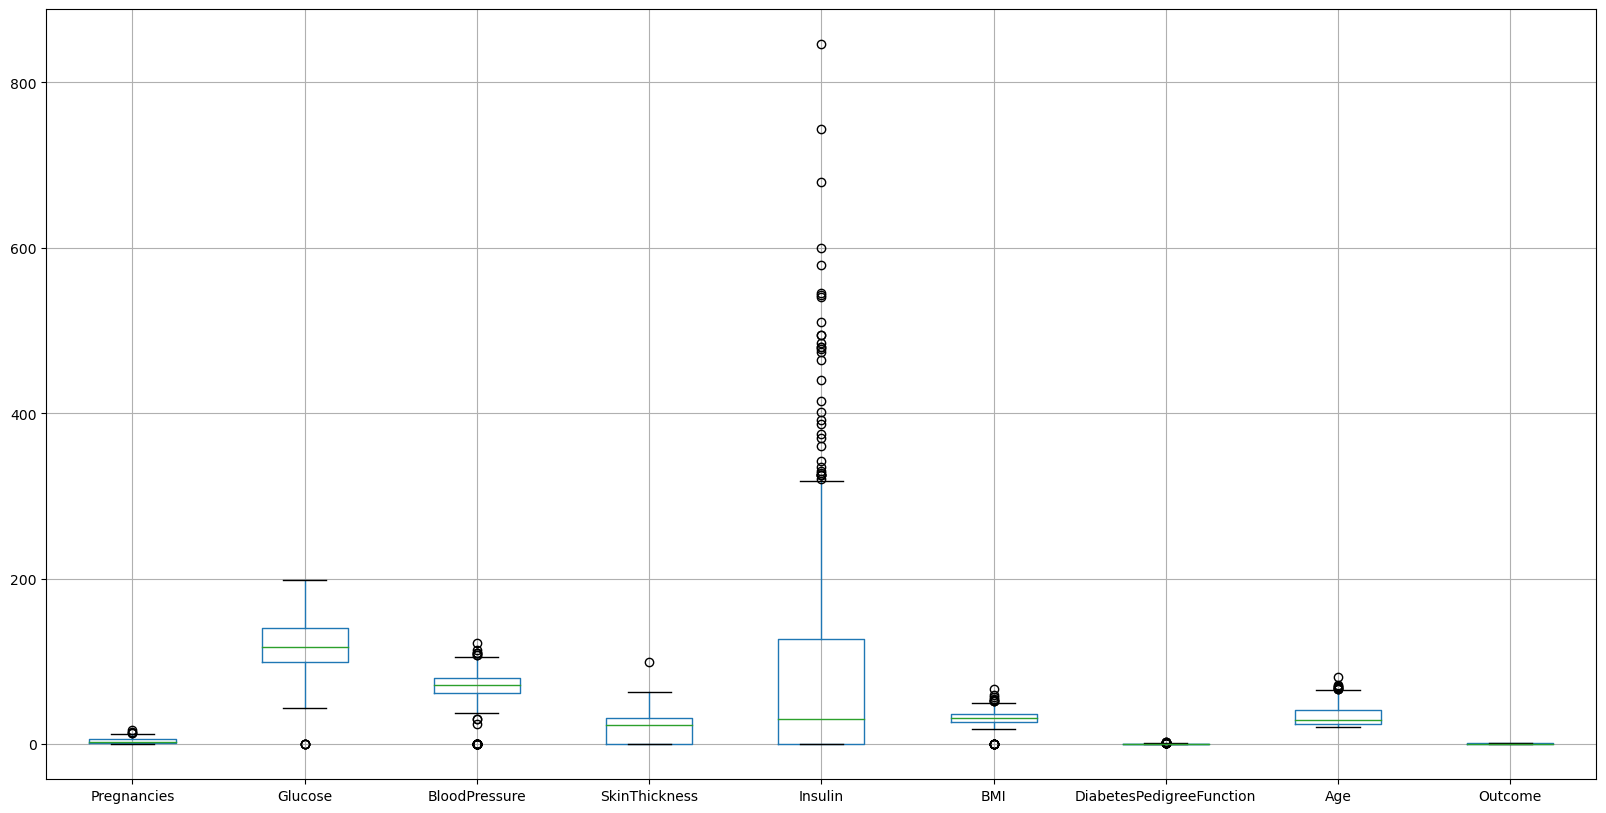

In [15]:
plt.figure(figsize = (20, 10))
df.boxplot()

### ` lets work on diabetes factors`

In [38]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


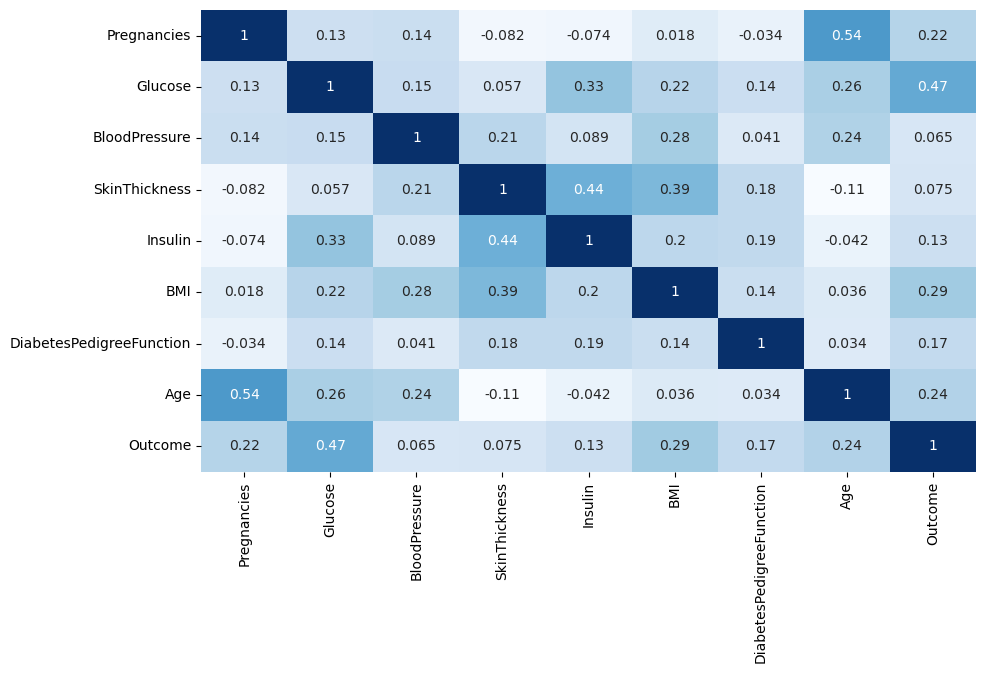

In [40]:
plt.figure(figsize = (10, 6))

sns.heatmap(df.corr(), annot = True, cbar = False, cmap = 'Blues')
plt.show()

## `Lets get insights from factors`

In [44]:
#split data to only diabetes 
di_df = df[df['Outcome'] == 1]

## Glucose

In [54]:
di_df['Glucose'].describe()

count    268.000000
mean     141.257463
std       31.939622
min        0.000000
25%      119.000000
50%      140.000000
75%      167.000000
max      199.000000
Name: Glucose, dtype: float64

<AxesSubplot:>

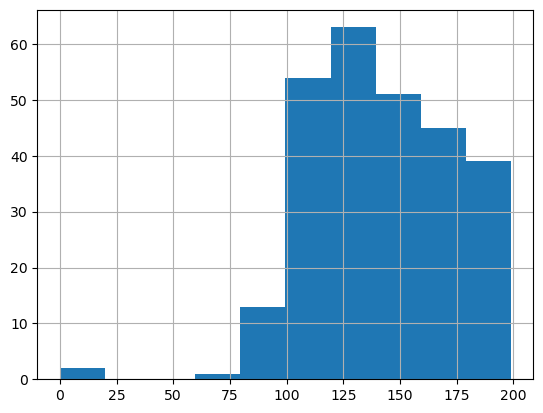

In [55]:
di_df['Glucose'].hist()

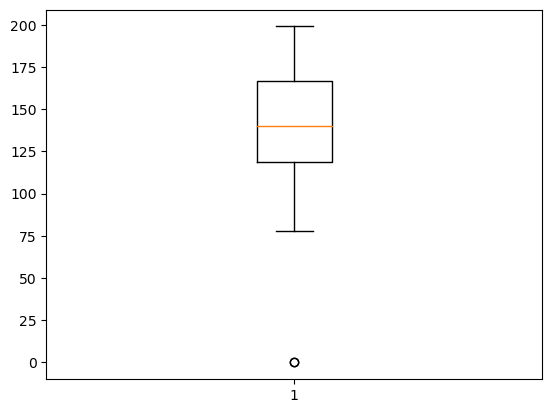

In [88]:
plt.boxplot(di_df['Glucose'])
plt.show()

### insights from glucose
##### most diabetes ranges with glucose factor from 100 to 200 thats mean this is dangerous area
##### glucose is the most factor which have effect on having diabetes so this is very sensitive 
##### we have a positive relationship between glucose and insulin thats mean we want to make a balance between them 

## Age

In [51]:
di_df['Age'].describe()

count    268.000000
mean      37.067164
std       10.968254
min       21.000000
25%       28.000000
50%       36.000000
75%       44.000000
max       70.000000
Name: Age, dtype: float64

In [89]:
Age_value_bins = pd.cut(di_df['Age'],
                     bins = [0, 20, 40, 60, np.inf],
                     labels =['0:20', '20:40', '40:60', '60 <'])

Age_value_bins

0      40:60
2      20:40
4      20:40
6      20:40
8      40:60
       ...  
755    20:40
757    40:60
759     60 <
761    40:60
766    40:60
Name: Age, Length: 268, dtype: category
Categories (4, object): ['0:20' < '20:40' < '40:60' < '60 <']

<AxesSubplot:xlabel='Age', ylabel='count'>

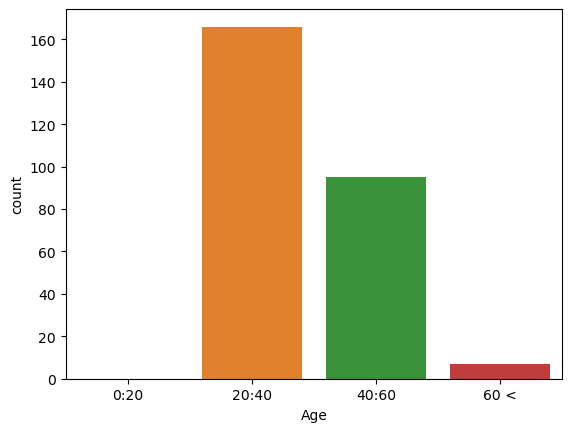

In [90]:
sns.countplot(x =Age_value_bins)

### insights from Age
##### after oi split age to groups it seems somthing strange that is most of diabetes patiens are from 20 to 40 age this is very young age
##### but that explain the positive relationship between BMI , age  and having diabetes 

## BMI

In [58]:
di_df['BMI'].describe()

count    268.000000
mean      35.142537
std        7.262967
min        0.000000
25%       30.800000
50%       34.250000
75%       38.775000
max       67.100000
Name: BMI, dtype: float64

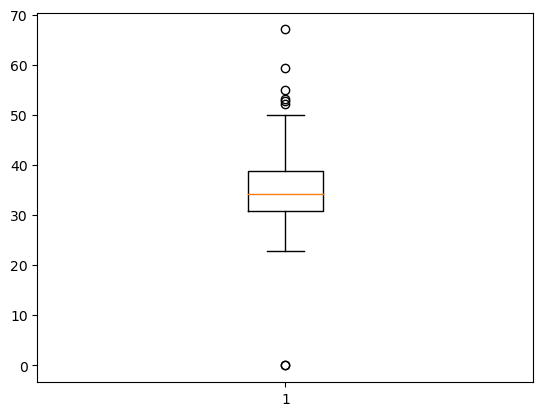

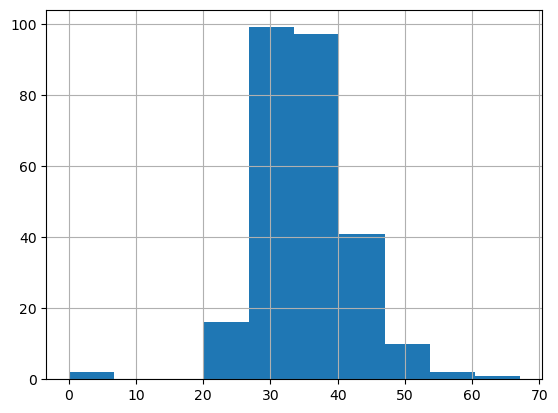

In [77]:
plt.boxplot(di_df['BMI'])
plt.show()


di_df['BMI'].hist()
plt.show()

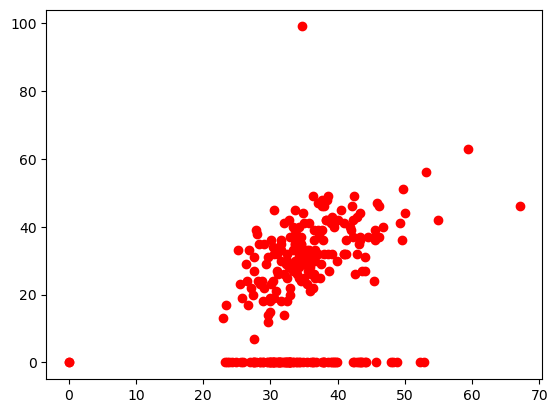

In [93]:
plt.scatter(di_df['BMI'], di_df['SkinThickness'], color = 'r')
plt.show()

### insights from BMI
##### from histogram i can see the dangerous area of diabetes this is from 28 to 40 
##### as heatmap told us we have a strong positive relationship between BMI and SkinThickness so thick persons have higher metabolic rate
##### from previous relationship we can suppose that SkinThicknesses are most people that may have diabetes

## Pregnancies

In [ ]:
di_df['Pregnancies']

In [64]:
preg_age_rel = di_df[['Age', 'Pregnancies']]

In [65]:
preg_age_rel

,Age,Pregnancies
0,50,6
2,32,8
4,33,0
6,26,3
8,53,2
...,...,...
755,37,1
757,52,0
759,66,6
761,43,9


<BarContainer object of 268 artists>

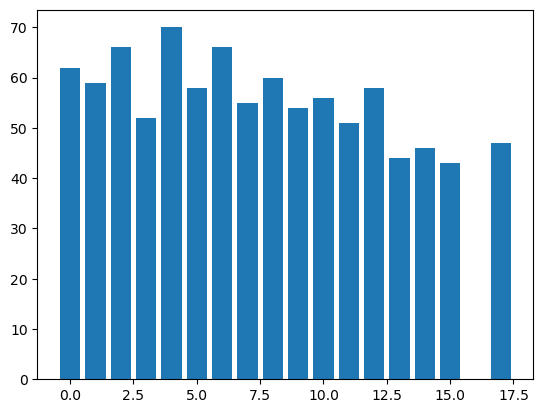

In [85]:
plt.bar(preg_age_rel['Pregnancies'], preg_age_rel['Age'])

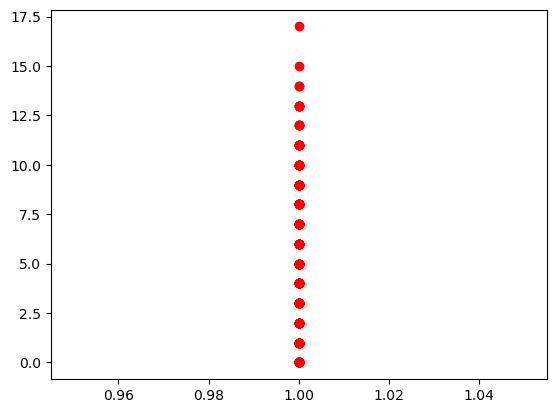

In [71]:
plt.scatter(di_df['Outcome'], di_df['Pregnancies'], color = 'r')
plt.show()

### Insights from Pregnancies
##### we can have a little suppose that say if num of Pregnancies increase the causation of diabetes will increase 
##### but this is not all the time but it is very dangerous because most age have diabetes from 20 to 40 and this is a prime of women

## Insulin

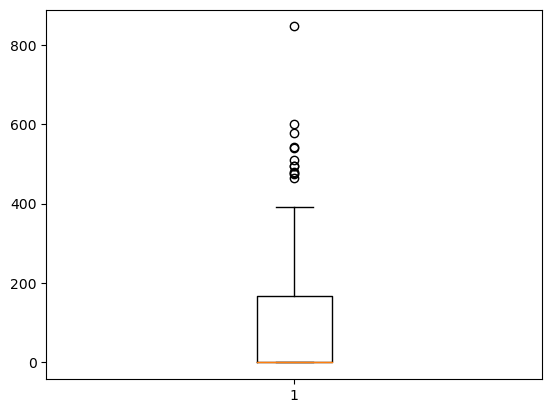

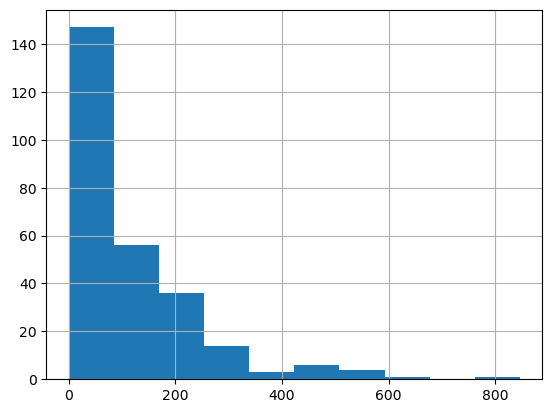

In [78]:
plt.boxplot(di_df['Insulin'])
plt.show()


di_df['Insulin'].hist()
plt.show()

### insights from Insulin
##### we can not let our insulin to be low because it is very dangrous area from 0 to 170
##### Insulin have a great positive relationship with glucose and SkinThikness this is mean we want to make a balance between it and glucose
##### this is a positive resone to confirm my suppose that SkinThiknesses have higher possibility to have diabetes